In [117]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path


In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
data= pd.read_csv("properatti_limpio.csv")

In [120]:
data.sample()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Ambientes,monoambiente,rooms_compuesta,PrecioUSD,precio_m2_apartment_y_ph,precio_m2_house_y_store,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,zona,DupliDesc,DupliPrice,Duplilat-lon,Total_duplicadas,Total_duplicadas_a_eliminar
63680,110402,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.63099,-58.4201892",-34.63099,-58.420189,150000.0,USD,2646675.0,150000.0,78.0,70.0,1923.076923,2142.857143,5.0,3.0,NaN,http://www.properati.com.ar/1c3lx_venta_depart...,venta de departamento 3 ambientes en caballito...,muy luminoso // senillosa 500,https://thumbs4.properati.com/5/fKZ9KyBeRAmrCo...,3.0,NaN,3.0,NaN,2142.857143,NaN,balcon,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,True,True,False,False


In [121]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Ambientes', 'monoambiente', 'rooms_compuesta',
       'PrecioUSD', 'precio_m2_apartment_y_ph', 'precio_m2_house_y_store',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'zona', 'DupliDesc',
       'DupliPrice', 'Duplilat-lon', 'Total_duplicadas',
       'Total_duplicadas_a_eliminar'],
      dtype='object')

In [122]:
data.place_name.value_counts().head(20)

Mar del Plata    5832
Rosario          3986
Córdoba          3510
Palermo          2084
Belgrano         1973
Caballito        1826
Nordelta         1560
Tigre            1534
Recoleta         1278
Flores           1199
Villa Urquiza    1086
La Plata         1065
Pilar             967
Almagro           962
Villa Crespo      941
Barrio Norte      912
Pinamar           816
San Telmo         754
San Miguel        682
Quilmes           611
Name: place_name, dtype: int64

In [123]:
mascara_MDQ = data.place_name == "Mar del Plata"
data_MDQ = data.place_name [ mascara_MDQ ]
data_MDQ

62       Mar del Plata
63       Mar del Plata
64       Mar del Plata
65       Mar del Plata
66       Mar del Plata
             ...      
69481    Mar del Plata
69482    Mar del Plata
69483    Mar del Plata
69484    Mar del Plata
69487    Mar del Plata
Name: place_name, Length: 5832, dtype: object

In [124]:
data[mascara_MDQ].property_type.value_counts()

apartment    4009
house        1238
PH            426
store         159
Name: property_type, dtype: int64

In [125]:
data[mascara_MDQ].property_type.shape

(5832,)

In [126]:
mascara_Palermo = data.place_name == "Palermo" 
mascara_Belgrano = data.place_name == "Belgrano"
mascara_Caballito = data.place_name == "Caballito"

In [127]:
mascara_barrios = mascara_Palermo | mascara_Belgrano | mascara_Caballito
data_barrios = data[mascara_barrios]
data_barrios

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Ambientes,monoambiente,rooms_compuesta,PrecioUSD,precio_m2_apartment_y_ph,precio_m2_house_y_store,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,zona,DupliDesc,DupliPrice,Duplilat-lon,Total_duplicadas,Total_duplicadas_a_eliminar
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,excelente monoambiente a estrenar amplio super...,jose hernandez 1400 monoambiente estrenar cat...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,NaN,1.0,1.0,NaN,3450.000000,NaN,NaN,NaN,NaN,pileta,NaN,estrenar,Capital & GBA,False,True,True,False,False
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,excelente dos ambientes estrenar amplio super...,"jose hernandez 1400 dos ambientes estrenar ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,NaN,NaN,NaN,NaN,3250.000000,NaN,NaN,NaN,NaN,pileta,NaN,estrenar,Capital & GBA,False,True,True,False,False
17,19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,350000.0,USD,6175575.00,350000.0,104.0,96.0,3365.384615,3645.833333,NaN,3.0,NaN,http://www.properati.com.ar/15bq8_venta_depart...,excelente semipiso al contra frente en bulnes ...,"bulnes y libertador: espectacular pulmon, con ...",https://thumbs4.properati.com/8/1y9fKHLee-aQQj...,NaN,NaN,3.0,NaN,3645.833333,NaN,balcon,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,True,False,False,False
19,21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,270500.0,USD,4772837.25,270500.0,118.0,73.0,2292.372881,3705.479452,NaN,4.0,NaN,http://www.properati.com.ar/15bqd_venta_depart...,"excelente zona, multiples medios de transporte...",departamento de 4 ambientes en venta en palermo,https://thumbs4.properati.com/0/P6wPIXB1wJFLVU...,4.0,NaN,4.0,NaN,3705.479452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,False,False,False,False
47,52,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.6222111,-58.4391283",-34.622211,-58.439128,110000.0,USD,1940895.00,110000.0,50.0,50.0,2200.000000,2200.000000,NaN,3.0,NaN,http://www.properati.com.ar/15buk_venta_depart...,departamento de 3 ambientes al contrafrente. s...,caballito 3 amb. en venta listo para escriturar,https://thumbs4.properati.com/7/eXZg2k6Uq2w8KB...,3.0,NaN,3.0,NaN,2200.000000,NaN,balcon,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69551,121128,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5568648226,-58.4477064427",-34.556865,-58.447706,359000.0,USD,6334375.50,359000.0,NaN,94.0,3819.148936,3819.148936,NaN,NaN,NaN,http://www.properati.com.ar/1cj4e_venta_depart...,excelente departamento ubicado en lo mejor de ...,departamento - belgrano,https://thumbs4.properati.com/8/xJHbGb92no0zmi...,NaN,NaN,NaN,NaN,3819.148936,NaN,balcon,cochera,NaN,NaN,NaN,NaN,Capital & GBA,False,True,True,False,False
69553,121134,sell,house,Caballito,|Arge

In [128]:
mascara_apartment = data_barrios.property_type == "apartment"

In [129]:
pd.set_option("display.max_columns", None)
data_regresion = data_barrios[mascara_apartment]
data_regresion.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Ambientes,monoambiente,rooms_compuesta,PrecioUSD,precio_m2_apartment_y_ph,precio_m2_house_y_store,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,zona,DupliDesc,DupliPrice,Duplilat-lon,Total_duplicadas,Total_duplicadas_a_eliminar
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,excelente monoambiente a estrenar amplio super...,jose hernandez 1400 monoambiente estrenar cat...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,NaN,1.0,1.0,NaN,3450.000000,NaN,NaN,NaN,NaN,pileta,NaN,estrenar,Capital & GBA,False,True,True,False,False
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,excelente dos ambientes estrenar amplio super...,"jose hernandez 1400 dos ambientes estrenar ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,NaN,NaN,NaN,NaN,3250.000000,NaN,NaN,NaN,NaN,pileta,NaN,estrenar,Capital & GBA,False,True,True,False,False
17,19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,350000.0,USD,6175575.00,350000.0,104.0,96.0,3365.384615,3645.833333,NaN,3.0,NaN,http://www.properati.com.ar/15bq8_venta_depart...,excelente semipiso al contra frente en bulnes ...,"bulnes y libertador: espectacular pulmon, con ...",https://thumbs4.properati.com/8/1y9fKHLee-aQQj...,NaN,NaN,3.0,NaN,3645.833333,NaN,balcon,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,True,False,False,False
19,21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,270500.0,USD,4772837.25,270500.0,118.0,73.0,2292.372881,3705.479452,NaN,4.0,NaN,http://www.properati.com.ar/15bqd_venta_depart...,"excelente zona, multiples medios de transporte...",departamento de 4 ambientes en venta en palermo,https://thumbs4.properati.com/0/P6wPIXB1wJFLVU...,4.0,NaN,4.0,NaN,3705.479452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,False,False,False,False
47,52,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.6222111,-58.4391283",-34.622211,-58.439128,110000.0,USD,1940895.00,110000.0,50.0,50.0,2200.000000,2200.000000,NaN,3.0,NaN,http://www.properati.com.ar/15buk_venta_depart...,departamento de 3 ambientes al contrafrente. s...,caballito 3 amb. en venta listo para escriturar,https://thumbs4.properati.com/7/eXZg2k6Uq2w8KB...,3.0,NaN,3.0,NaN,2200.000000,NaN,balcon,NaN,NaN,NaN,NaN,NaN,Capital & GBA,False,True,False,False,False


In [130]:
data_regresion.shape

(5258, 44)

In [131]:
data_regresion.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Ambientes', 'monoambiente', 'rooms_compuesta',
       'PrecioUSD', 'precio_m2_apartment_y_ph', 'precio_m2_house_y_store',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'zona', 'DupliDesc',
       'DupliPrice', 'Duplilat-lon', 'Total_duplicadas',
       'Total_duplicadas_a_eliminar'],
      dtype='object')

In [132]:
is_null_result = data_regresion.isnull().sum()
print(is_null_result)

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                       0
lat-lon                           0
lat                               0
lon                               0
price                           277
currency                        277
price_aprox_local_currency      277
price_aprox_usd                 242
surface_total_in_m2            1034
surface_covered_in_m2           210
price_usd_per_m2                291
price_per_m2                    451
floor                          4478
rooms                          1729
expenses                       3944
properati_url                     0
description                       0
title                             0
image_thumbnail                   0
Ambientes                      1859
monoambiente                

columnas a usar en la regresión:

X:
rooms
amenitie_balcon
amenitie_cochera
amenitie_parrilla
amenitie_pileta
amenitie_amoblado
place_name

Y:
price_usd_per_m2

In [133]:
# decidimos reemplazar los NAN por 0 
data_regresion.amenitie_balcon.unique()

array([nan, 'balcon'], dtype=object)

In [134]:
 data_regresion[["amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]] = data_regresion[["amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]] .fillna(value=0)
data_regresion.amenitie_cochera.unique

<bound method Series.unique of 7              0
8              0
17             0
19             0
47             0
          ...   
69547          0
69551    cochera
69557          0
69560          0
69561          0
Name: amenitie_cochera, Length: 5258, dtype: object>

# Regresión

In [135]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import <nombre modelo>

In [136]:
#data_regresion.surface_covered_in_m2 = data_regresion.surface_covered_in_m2.dropna(axis=0, inplace=True)
data_regresion = data_regresion.dropna(subset=["surface_covered_in_m2","price_aprox_usd"])
print(data_regresion.shape)
data_regresion.surface_covered_in_m2.isnull().sum()
data_regresion.price_aprox_usd.isnull().sum()

(4839, 44)


0

In [137]:
#Intentamos llevar a 0 los NAN de la columna rooms_compuesta
data_regresion.rooms_compuesta.isnull().value_counts()
#esto es para eliminarlas data_regresion = data_regresion.dropna(subset=["rooms_compuesta")

False    3724
True     1115
Name: rooms_compuesta, dtype: int64

In [138]:
data_regresion.loc[:,["rooms_compuesta"]].describe()

,rooms_compuesta
count,3724.000000
mean,2.527658
std,3.880298
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,85.000000


In [139]:
media_habitaciones = data_regresion.rooms_compuesta.mean().round()
media_habitaciones

3.0

In [140]:
# deliveradamente reemplazamos los NAN con la media de antes, 
data_regresion[["rooms_compuesta"]] = data_regresion[["rooms_compuesta"]].fillna(value=media_habitaciones)
data_regresion.rooms_compuesta.unique()

array([ 1.,  3.,  4.,  2.,  5., 18.,  7.,  6., 20., 77., 30., 32., 60.,
       40., 85., 57.,  8., 11., 70., 15., 10., 21.])

In [141]:
data_regresion.loc[:,["rooms_compuesta"]].describe()

,rooms_compuesta
count,4839.000000
mean,2.636495
std,3.409723
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,85.000000


In [142]:
# Seleccionamos la variable predictora y la objetivo.
X = data_regresion[["rooms_compuesta"]]
y = data_regresion[["price_usd_per_m2"]]

# Importamos, Instanciamos, Fiteamos, etc..

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X e y.
model = lm.fit(X, y)
#
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
# print ('surface_covered_in_m2=', ' ', model.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   [2960.28348934]
R2_train=   9.595773143600272e-05


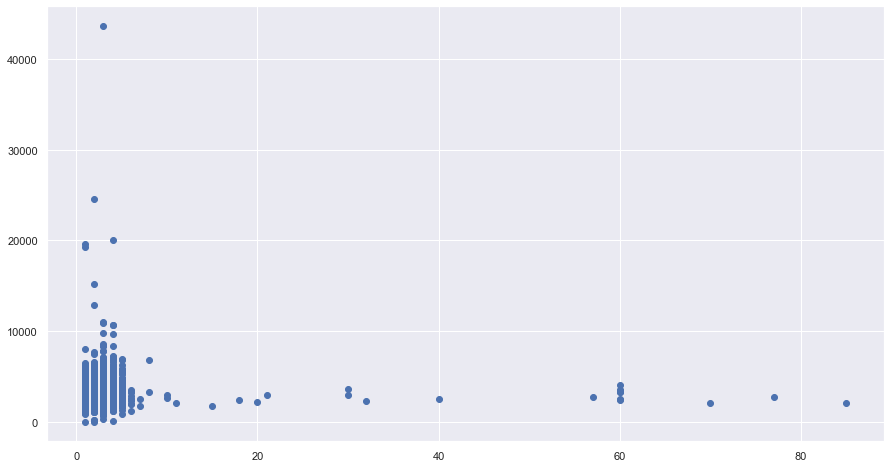

In [143]:
#encontramos outliers en el eje X
plt.scatter(data_regresion.rooms_compuesta, data_regresion.price_usd_per_m2)

In [144]:
data_regresion.loc[:,["price_usd_per_m2","rooms_compuesta"]].describe()

,price_usd_per_m2,rooms_compuesta
count,4839.000000,4839.000000
mean,2969.624680,2.636495
std,1233.259027,3.409723
min,26.076636,1.000000
25%,2383.333333,2.000000
50%,2787.878788,3.000000
75%,3289.473684,3.000000
max,43640.000000,85.000000


mask_1room = data_regresion.rooms_compuesta == 1
data_1room = data_regresion[mask_1room]
data_1room.loc[:,["surface_total_in_m2","surface_covered_in_m2"]].describe()

mask_2room = data_regresion.rooms_compuesta == 2
data_2room = data_regresion[mask_2room]
data_2room.loc[:,["surface_total_in_m2","surface_covered_in_m2"]].describe()

mask_3room = data_regresion.rooms_compuesta == 3
data_3room = data_regresion[mask_3room]
data_3room.loc[:,["surface_total_in_m2","surface_covered_in_m2"]].describe()

mask_4room = data_regresion.rooms_compuesta == 4
data_4room = data_regresion[mask_4room]
data_4room.loc[:,["surface_total_in_m2","surface_covered_in_m2"]].describe()

mask_5room = data_regresion.rooms_compuesta == 5
data_5room = data_regresion[mask_5room]
data_5room.loc[:,["surface_total_in_m2","surface_covered_in_m2"]].describe()

mask_6room = data_regresion.rooms_compuesta == 6
data_6room = data_regresion[mask_6room]
data_6room.loc[:,["surface_total_in_m2","surface_covered_in_m2"]].describe()

In [145]:
data_regresion.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Ambientes', 'monoambiente', 'rooms_compuesta',
       'PrecioUSD', 'precio_m2_apartment_y_ph', 'precio_m2_house_y_store',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'zona', 'DupliDesc',
       'DupliPrice', 'Duplilat-lon', 'Total_duplicadas',
       'Total_duplicadas_a_eliminar'],
      dtype='object')

In [146]:
# acà elegimos cuales columnas elegimos para la regresiòn multiple
columnas_para_regresion = data_regresion[["place_name", 'price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2', 'price_usd_per_m2', 'floor','rooms_compuesta','amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla','amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'lat', 'lon']]
data_reg_multiple = columnas_para_regresion.copy()
data_reg_multiple.shape


(4839, 15)

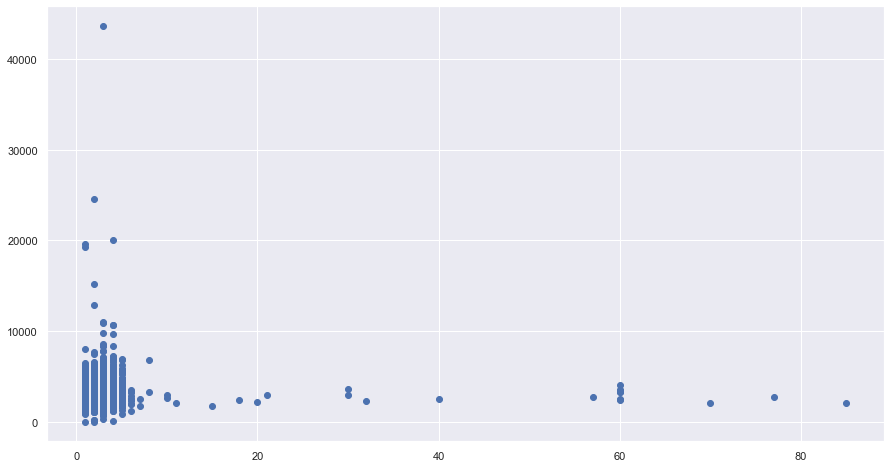

In [147]:
plt.scatter(data_reg_multiple.rooms_compuesta, data_reg_multiple.price_usd_per_m2)
plt.show()


# los rooms con más de 6 habitaciones, los eliminamos (son OUTLIERS) - Son departamentos
# Los que tienen precio mayor a 8.000 USD/m2 son OUTLIERS
# los que venden a menos de 500 USD/m2 son OUTLIERS
# utilizamos los 3 sigma para definir 

In [148]:
# vemos cuantos nulos hay:
data_reg_multiple.isnull().sum()
# como conclusion eliminamos del DF a surface_total_in_m2 y a floor

place_name                  0
price_aprox_usd             0
surface_total_in_m2       956
surface_covered_in_m2       0
price_usd_per_m2            0
floor                    4088
rooms_compuesta             0
amenitie_balcon             0
amenitie_cochera            0
amenitie_parrilla           0
amenitie_pileta             0
amenitie_amoblado           0
estrenar                    0
lat                         0
lon                         0
dtype: int64

In [149]:
data_reg_multiple.columns

Index(['place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms_compuesta',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'lat', 'lon'],
      dtype='object')

In [150]:
data_reg_multiple.drop ("surface_total_in_m2", inplace=True, axis=1)

In [151]:
data_reg_multiple.drop ("floor", inplace=True, axis=1)

In [152]:
# ya eliminamos las 2 columnas
data_reg_multiple

,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
7,Belgrano,138000.0,40.0,3066.666667,1.0,0,0,0,pileta,0,estrenar,-34.559873,-58.443362
8,Belgrano,195000.0,60.0,3000.000000,3.0,0,0,0,pileta,0,estrenar,-34.559873,-58.443362
17,Palermo,350000.0,96.0,3365.384615,3.0,balcon,0,0,0,0,0,-34.580504,-58.405874
19,Palermo,270500.0,73.0,2292.372881,4.0,0,0,0,0,0,0,-34.590926,-58.411665
47,Caballito,110000.0,50.0,2200.000000,3.0,balcon,0,0,0,0,0,-34.622211,-58.439128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69544,Palermo,620000.0,85.0,6888.888889,3.0,balcon,cochera,0,pileta,0,0,-34.570179,-58.432229
69546,Belgrano,110000.0,35.0,3142.857143,3.0,0,0,0,0,0,0,-34.568150,-58.455620
69547,Palermo,265000.0,88.0,2650.000000,1.0,balcon,0,parrilla,piscina,0,0,-34.595668,-58.415143
69551,Belgrano,359000.0,94.0,3819.148936,3.0,balcon,cochera,0,0,0,0,-34.556865,-58.447706


In [153]:
data_reg_multiple.isnull().sum()

place_name               0
price_aprox_usd          0
surface_covered_in_m2    0
price_usd_per_m2         0
rooms_compuesta          0
amenitie_balcon          0
amenitie_cochera         0
amenitie_parrilla        0
amenitie_pileta          0
amenitie_amoblado        0
estrenar                 0
lat                      0
lon                      0
dtype: int64

# Hacemos la regresiòn multiple

In [154]:
data_reg_multiple.corr()

,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,lat,lon
price_aprox_usd,1.000000,0.338516,0.480849,0.101157,0.218670,0.142742
surface_covered_in_m2,0.338516,1.000000,0.016539,0.059363,0.072008,0.061934
price_usd_per_m2,0.480849,0.016539,1.000000,0.009796,0.240129,0.138718
rooms_compuesta,0.101157,0.059363,0.009796,1.000000,0.035070,0.028473
lat,0.218670,0.072008,0.240129,0.035070,1.000000,-0.218804
lon,0.142742,0.061934,0.138718,0.028473,-0.218804,1.000000


In [155]:
data_reg_multiple.sample(5)


,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
39865,Caballito,68000.0,35.0,1942.857143,2.0,0,0,0,0,0,0,-34.621668,-58.439445
39784,Palermo,240000.0,70.0,3116.883117,4.0,balcon,cochera,0,0,0,0,-34.596187,-58.412853
59028,Caballito,212000.0,79.0,2409.090909,3.0,balcon,cochera,0,0,0,estrenar,-34.622069,-58.454508
55803,Belgrano,262000.0,76.0,3275.000000,2.0,balcon,cochera,0,0,0,0,-34.564403,-58.463026
57355,Belgrano,123000.0,44.0,2617.021277,1.0,balcon,cochera,0,0,0,estrenar,-34.554609,-58.439298


In [156]:
# antes de hacer dummies verificamos que los datos de la columna sean los mismos (así no genera muchas dummies)
data_reg_multiple.replace(to_replace= ["amoblado"],value=1, inplace=True)

In [157]:
data_reg_multiple.replace(to_replace= ["amueblado"],value=1, inplace=True)

In [158]:
data_reg_multiple.amenitie_amoblado.unique()

array([0, 1], dtype=int64)

In [159]:
data_reg_multiple.amenitie_balcon.unique()
data_reg_multiple.replace(to_replace= ["balcon"],value=1, inplace=True)
data_reg_multiple.amenitie_balcon.unique()

array([0, 1], dtype=int64)

In [160]:
data_reg_multiple.amenitie_cochera.unique()
data_reg_multiple.replace(to_replace= ['cochera', 'estacionamiento', 'garage'],value=1, inplace=True)
data_reg_multiple.amenitie_balcon.unique()

array([0, 1], dtype=int64)

In [161]:
data_reg_multiple.amenitie_parrilla.unique()
data_reg_multiple.replace(to_replace= ['parrilla', 'asador'],value=1, inplace=True)
data_reg_multiple.amenitie_parrilla.unique()

array([0, 1], dtype=int64)

In [162]:
data_reg_multiple.amenitie_pileta.unique()
data_reg_multiple.replace(to_replace= ['pileta', 'piscina'],value=1, inplace=True)
data_reg_multiple.amenitie_pileta.unique()

array([1, 0], dtype=int64)

In [163]:
data_reg_multiple.estrenar.unique()
data_reg_multiple.replace(to_replace= ['estrenar', 'estre'],value=1, inplace=True)
data_reg_multiple.estrenar.unique()

array([1, 0], dtype=int64)

In [164]:
# ESTO ES DUMMIES Y NO LO USAMOS
# numcol_qcategories = data_reg_multiple[["place_name", "amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]]
# numcol_qcategories_dummies = pd.get_dummies(numcol_qcategories, drop_first = True, prefix='numcol')
# numcol_qcategories_dummies 
# data_dummy = pd.DataFrame(numcol_qcategories_dummies)
# print(data_dummy.dtypes)
# data_reg_multiple.dtypes

# Seleccionamos la variable predictora y la objetivo.
X = data_regresion[["rooms_compuesta"]]
y = data_regresion[["price_usd_per_m2"]]

# Importamos, Instanciamos, Fiteamos, etc..

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X e y.
model = lm.fit(X, y)
#
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
# print ('surface_covered_in_m2=', ' ', model.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X, y))

In [165]:
#model.fit(Xtrain, ytrain)

In [166]:
#model.summary()

In [167]:
data_reg_multiple.sample(5)

,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
59833,Belgrano,117000.00,42.0,2785.714286,1.0,0,1,1,0,0,1,-34.556387,-58.461898
57688,Caballito,89000.00,36.0,2170.731707,3.0,1,0,0,0,0,0,-34.613368,-58.435990
10051,Palermo,268000.00,116.0,2126.984127,3.0,1,0,0,0,0,0,-34.581757,-58.423377
61023,Belgrano,470560.05,108.0,3460.000368,3.0,0,0,1,1,0,0,-34.569867,-58.457581
49108,Caballito,255000.00,149.0,1711.409396,3.0,1,1,0,0,0,0,-34.620807,-58.440519


In [168]:
data_reg_multiple.shape

(4839, 13)

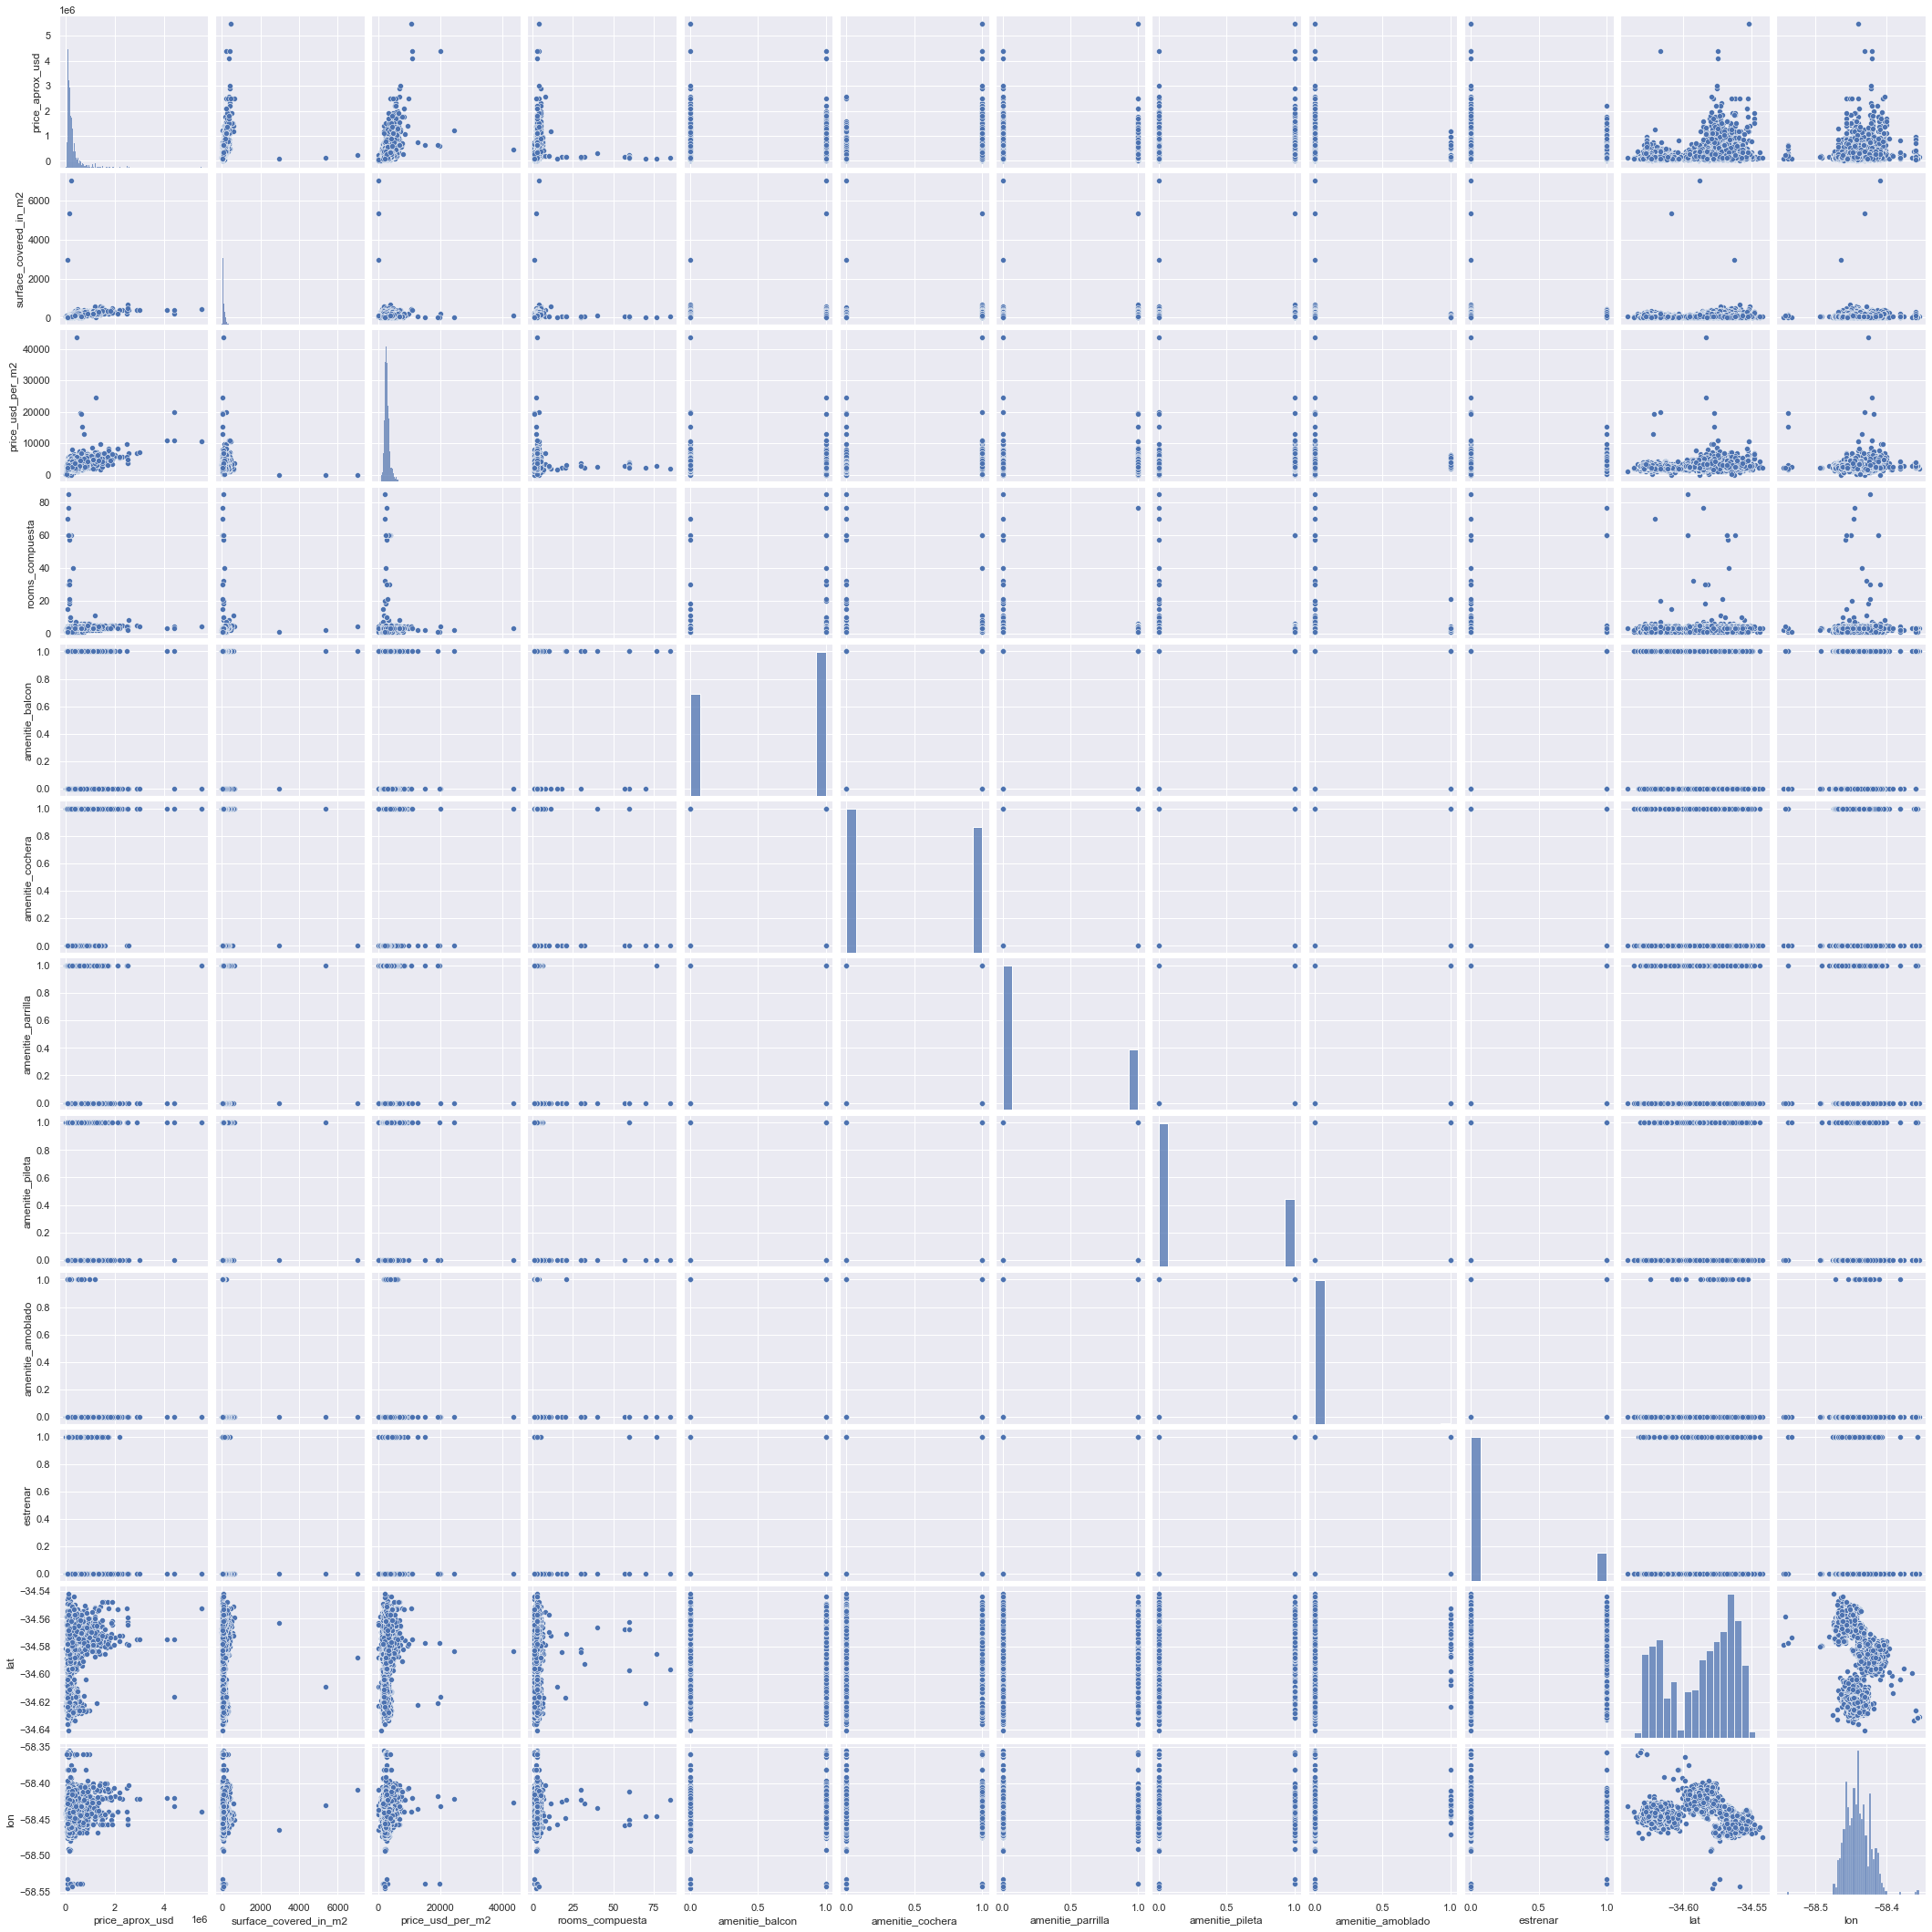

In [169]:
#veo graficamente como dan las relaciones entre variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(data_reg_multiple);

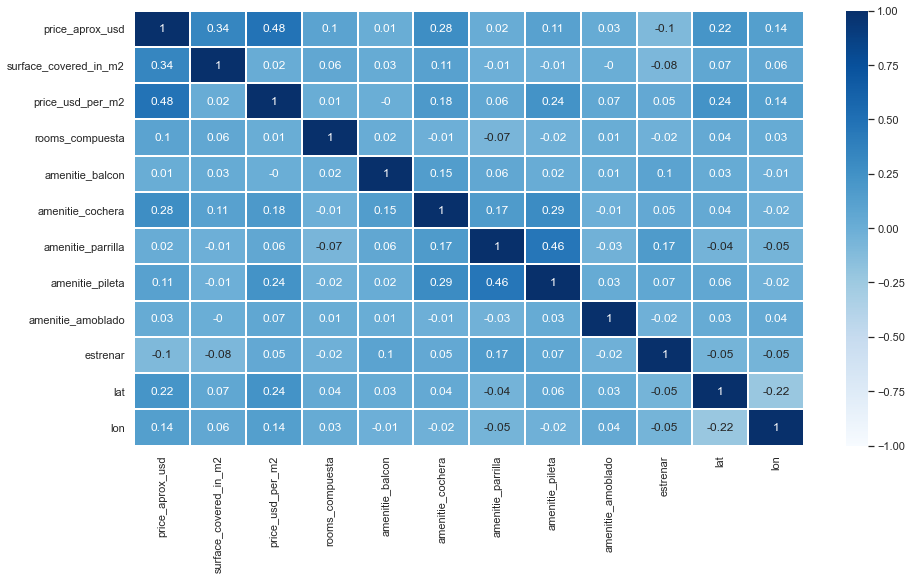

In [170]:
# hago un heatmap para ver la colinealidad:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_reg_multiple.corr().round(2), linewidths=1,  annot=True, vmin=-1,square=False,  cmap='Blues');
#(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

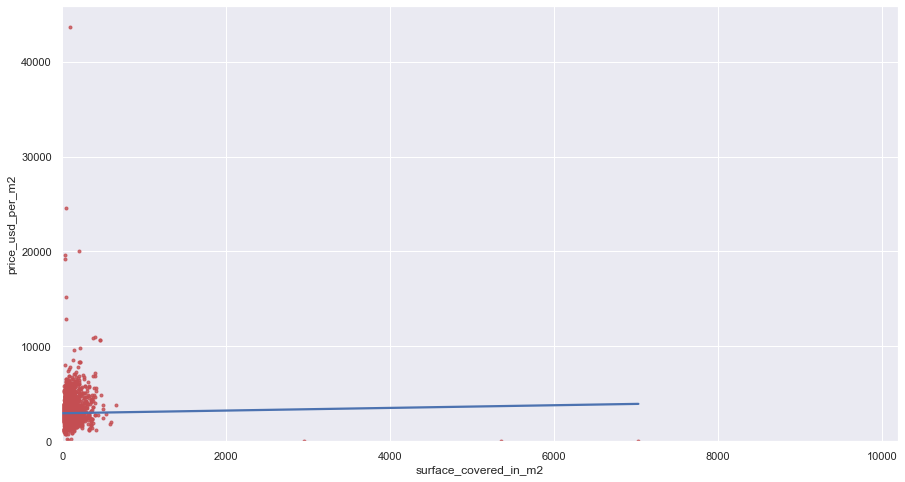

In [171]:
# elijo la variable de mayor correlacion
#sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
sns.regplot(data = data_reg_multiple, x = "surface_covered_in_m2", y = "price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,10200)
plt.ylim(bottom=0);

### Mejoramos la limpieza de la matriz de datos

In [172]:
data_reg_multiple

,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
7,Belgrano,138000.0,40.0,3066.666667,1.0,0,0,0,1,0,1,-34.559873,-58.443362
8,Belgrano,195000.0,60.0,3000.000000,3.0,0,0,0,1,0,1,-34.559873,-58.443362
17,Palermo,350000.0,96.0,3365.384615,3.0,1,0,0,0,0,0,-34.580504,-58.405874
19,Palermo,270500.0,73.0,2292.372881,4.0,0,0,0,0,0,0,-34.590926,-58.411665
47,Caballito,110000.0,50.0,2200.000000,3.0,1,0,0,0,0,0,-34.622211,-58.439128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69544,Palermo,620000.0,85.0,6888.888889,3.0,1,1,0,1,0,0,-34.570179,-58.432229
69546,Belgrano,110000.0,35.0,3142.857143,3.0,0,0,0,0,0,0,-34.568150,-58.455620
69547,Palermo,265000.0,88.0,2650.000000,1.0,1,0,1,1,0,0,-34.595668,-58.415143
69551,Belgrano,359000.0,94.0,3819.148936,3.0,1,1,0,0,0,0,-34.556865,-58.447706


In [173]:
# eliminamos los outliers de "rooms_compuesta" con ambientes mayores a 6
# vemos que son aprox. 25 outliers, entonces, eliminamos estas filas
mascara_ambientes6 = data_reg_multiple.rooms_compuesta > 6
data_reg_multiple = data_reg_multiple[data_reg_multiple.rooms_compuesta<=6]
data_reg_multiple.shape

(4812, 13)

In [174]:
data_reg_multiple[mascara_ambientes6].shape

(0, 13)

In [175]:
data_reg_multiple

,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
7,Belgrano,138000.0,40.0,3066.666667,1.0,0,0,0,1,0,1,-34.559873,-58.443362
8,Belgrano,195000.0,60.0,3000.000000,3.0,0,0,0,1,0,1,-34.559873,-58.443362
17,Palermo,350000.0,96.0,3365.384615,3.0,1,0,0,0,0,0,-34.580504,-58.405874
19,Palermo,270500.0,73.0,2292.372881,4.0,0,0,0,0,0,0,-34.590926,-58.411665
47,Caballito,110000.0,50.0,2200.000000,3.0,1,0,0,0,0,0,-34.622211,-58.439128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69544,Palermo,620000.0,85.0,6888.888889,3.0,1,1,0,1,0,0,-34.570179,-58.432229
69546,Belgrano,110000.0,35.0,3142.857143,3.0,0,0,0,0,0,0,-34.568150,-58.455620
69547,Palermo,265000.0,88.0,2650.000000,1.0,1,0,1,1,0,0,-34.595668,-58.415143
69551,Belgrano,359000.0,94.0,3819.148936,3.0,1,1,0,0,0,0,-34.556865,-58.447706


In [176]:
# limpiamos superficie

In [177]:
# Calculamos 1 desvìo STD
data_reg_multiple["surface_covered_in_m2_zscore"] = data_reg_multiple[["surface_covered_in_m2"]].apply(lambda x: (x - x.mean()) / x.std())

In [178]:
# Contamos outliers (desvios mayores a 3 sigmas)
print(data_reg_multiple["surface_covered_in_m2_zscore"][abs(data_reg_multiple["surface_covered_in_m2_zscore"]) > 3].count())

6


In [179]:
# estos son las filas a borrar con SIGMA mayor a 3
print(data_reg_multiple["surface_covered_in_m2"][abs(data_reg_multiple["surface_covered_in_m2_zscore"]) > 3])

5723      587.0
5854      530.0
6081     5350.0
38712     655.0
52722    2949.0
53680    7029.0
Name: surface_covered_in_m2, dtype: float64


In [180]:
data_reg_multiple

,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon,surface_covered_in_m2_zscore
7,Belgrano,138000.0,40.0,3066.666667,1.0,0,0,0,1,0,1,-34.559873,-58.443362,-0.279658
8,Belgrano,195000.0,60.0,3000.000000,3.0,0,0,0,1,0,1,-34.559873,-58.443362,-0.142283
17,Palermo,350000.0,96.0,3365.384615,3.0,1,0,0,0,0,0,-34.580504,-58.405874,0.104993
19,Palermo,270500.0,73.0,2292.372881,4.0,0,0,0,0,0,0,-34.590926,-58.411665,-0.052989
47,Caballito,110000.0,50.0,2200.000000,3.0,1,0,0,0,0,0,-34.622211,-58.439128,-0.210970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69544,Palermo,620000.0,85.0,6888.888889,3.0,1,1,0,1,0,0,-34.570179,-58.432229,0.029436
69546,Belgrano,110000.0,35.0,3142.857143,3.0,0,0,0,0,0,0,-34.568150,-58.455620,-0.314002
69547,Palermo,265000.0,88.0,2650.000000,1.0,1,0,1,1,0,0,-34.595668,-58.415143,0.050043
69551,Belgrano,359000.0,94.0,3819.148936,3.0,1,1,0,0,0,0,-34.556865,-58.447706,0.091255


In [181]:
data_reg_multiple.shape

(4812, 14)

In [182]:
#Dropeamos las filas con outliers (son 6 filas)
data_reg_multiple.drop(data_reg_multiple["surface_covered_in_m2_zscore"][abs(data_reg_multiple['surface_covered_in_m2_zscore']) > 3].index,inplace=True)
print("")
print(data_reg_multiple.surface_covered_in_m2_zscore.describe())


count    4806.000000
mean       -0.023747
std         0.406811
min        -0.526934
25%        -0.279658
50%        -0.156020
75%         0.070649
max         2.879975
Name: surface_covered_in_m2_zscore, dtype: float64


In [183]:
# dropeamos la columna temporal zscore
data_reg_multiple.drop(columns=["surface_covered_in_m2_zscore"], inplace=True)

In [184]:
data_reg_multiple.describe()

,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
count,4.806000e+03,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000
mean,2.650234e+05,77.257179,2971.946612,2.434665,0.584478,0.467749,0.296921,0.321473,0.005826,0.163337,-34.587578,-58.440281
std,2.973991e+05,59.226246,1232.936975,1.004152,0.492863,0.499011,0.456949,0.467091,0.076114,0.369712,0.024186,0.017869
min,1.170634e+04,4.000000,162.588056,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.641024,-58.544722
25%,1.200000e+05,40.000000,2384.615385,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.613006,-58.453319
50%,1.770000e+05,58.000000,2788.461538,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.581850,-58.440737
75%,2.950000e+05,91.000000,3289.473684,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-34.566262,-58.429601
max,5.500000e+06,500.000000,43640.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-34.541856,-58.354956


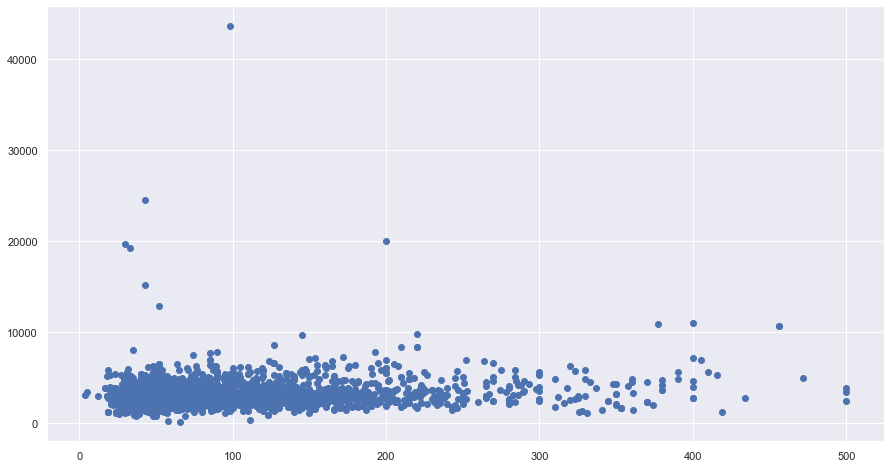

In [185]:
import matplotlib.pyplot as plt
plt.scatter(data_reg_multiple['surface_covered_in_m2'], data_reg_multiple['price_usd_per_m2'])
plt.show()


In [186]:
# Limpiamos precio por m2 con más de 3 sigmas

In [187]:
# Calculamos 1 desvìo STD
data_reg_multiple["price_usd_per_m2_zscore"] = data_reg_multiple[["price_usd_per_m2"]].apply(lambda x: (x - x.mean()) / x.std())

In [188]:
# Contamos outliers (desvios mayores a 3 sigmas)
print(data_reg_multiple["price_usd_per_m2_zscore"][abs(data_reg_multiple["price_usd_per_m2_zscore"]) > 3].count())

34


In [189]:
# estos son las filas a borrar con SIGMA mayor a 3
print(data_reg_multiple["price_usd_per_m2"][abs(data_reg_multiple["price_usd_per_m2_zscore"]) > 3])

5196      8333.333333
5924      6944.444444
6723      7267.441860
11727     6904.761905
20702     6818.181818
20983    20000.000000
21003    12842.105263
21014    24574.000000
21447    15190.697674
21452    19656.666667
21725    19242.424242
26546     9655.172414
31203     7177.033493
33090     9803.149606
40603    10875.331565
41258     7812.500000
42152     6774.193548
43581    10658.914729
43830    10638.297872
44210    11000.000000
47011     6800.000000
48785     8068.237714
53852     7142.857143
58398     8582.677165
58762     6919.642857
58922     8400.000000
58927     7432.432432
59017     7058.823529
59276     8400.000000
61605     7666.666667
62686    43640.000000
65691     7777.777778
69542     6888.888889
69544     6888.888889
Name: price_usd_per_m2, dtype: float64


In [190]:
data_reg_multiple.shape

(4806, 14)

In [191]:
# llegamos acà
#Dropeamos las filas con outliers (son 34 filas)
data_reg_multiple.drop(data_reg_multiple["price_usd_per_m2_zscore"][abs(data_reg_multiple['price_usd_per_m2_zscore']) > 3].index,inplace=True)
print("")
print(data_reg_multiple.price_usd_per_m2.describe())


count    4772.000000
mean     2914.782035
std       835.065083
min       162.588056
25%      2379.871462
50%      2784.090909
75%      3277.427638
max      6650.717703
Name: price_usd_per_m2, dtype: float64


In [192]:
# dropeamos la columna temporal zscore
data_reg_multiple.drop(columns=["price_usd_per_m2_zscore"], inplace=True)

In [193]:
data_reg_multiple.describe()

,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
count,4.772000e+03,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000
mean,2.541188e+05,76.495180,2914.782035,2.430218,0.585499,0.465633,0.296102,0.318734,0.005868,0.163244,-34.587661,-58.440335
std,2.404020e+05,57.774246,835.065083,1.002801,0.492687,0.498870,0.456584,0.466035,0.076383,0.369627,0.024206,0.017753
min,1.170634e+04,4.000000,162.588056,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.641024,-58.544722
25%,1.198500e+05,40.000000,2379.871462,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.613113,-58.453430
50%,1.750000e+05,58.000000,2784.090909,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.581987,-58.440815
75%,2.900000e+05,90.000000,3277.427638,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-34.566265,-58.429601
max,2.500000e+06,500.000000,6650.717703,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-34.541856,-58.354956


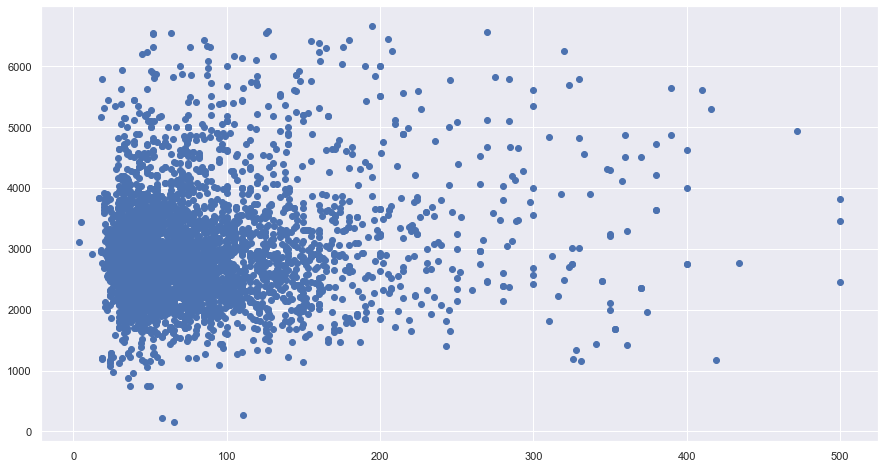

In [194]:
import matplotlib.pyplot as plt
plt.scatter(data_reg_multiple['surface_covered_in_m2'], data_reg_multiple['price_usd_per_m2'])
plt.show()


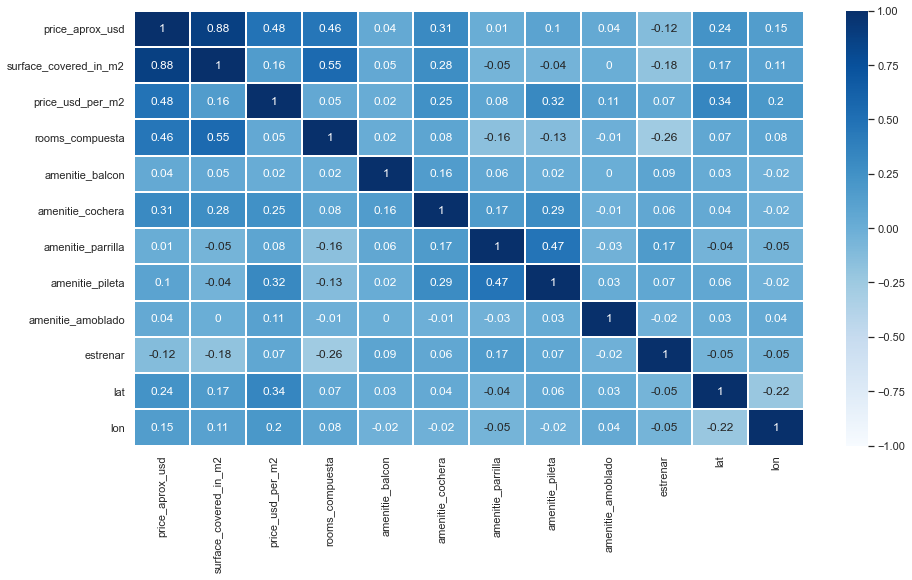

In [195]:
# hago un heatmap para ver la colinealidad:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_reg_multiple.corr().round(2), linewidths=1,  annot=True, vmin=-1,square=False,  cmap='Blues');
#(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

In [196]:
data_reg_multiple.sample(5)

,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon
14384,Caballito,170000.0,72.0,2266.666667,4.0,1,0,0,0,0,0,-34.606593,-58.442991
32196,Palermo,140000.0,35.0,3333.333333,1.0,1,0,0,0,0,0,-34.577365,-58.413150
1358,Belgrano,118526.0,42.0,2822.047619,1.0,0,0,0,1,0,0,-34.562708,-58.465375
61159,Palermo,88020.0,28.0,2750.625000,3.0,0,0,0,0,0,0,-34.598174,-58.410136
55778,Caballito,243000.0,88.0,2314.285714,3.0,1,1,1,1,0,0,-34.608951,-58.448903


In [197]:
# 1. Armo la regresión lineal
from sklearn.linear_model import LinearRegression

In [198]:
# 2. Elegir los hiperparámetros del modelo
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [199]:
# 3. Preparar los datos en una matriz de features y un vector target
# Creamos X e y
feature_cols = ["surface_covered_in_m2", "rooms_compuesta", "amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]
X = data_reg_multiple[feature_cols]
y = data_reg_multiple.price_usd_per_m2

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (4772, 8)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (4772,)
Type y: <class 'pandas.core.series.Series'>


In [200]:
# 4. Separar los sets de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [201]:
# 5. Ajustar el modelo a los datos de entrenamiento
model.fit(Xtrain, ytrain)
print("𝛽1^ o pendiente = ", model.coef_)
print("𝛽0^ = ", model.intercept_)

𝛽1^ o pendiente =  [ 2.11495743e+00  7.92743664e-02 -9.15606377e+00  2.25052899e+02
 -1.63521784e+02  5.71441590e+02  1.06897004e+03  2.22290401e+02]
𝛽0^ =  2479.761140243147


# 6. Predecir etiquetas para datos desconocidos
# Usando el método del objeto
test = 200
test_sklearn = np.array(test).reshape(-1,1)
model.predict(test_sklearn)

In [202]:
ypred = model.predict(Xtest)
ypred

array([2628.04598334, 3167.10577883, 2575.17204762, ..., 2443.29535111,
       2669.72817222, 2618.97741439])

In [203]:
# 7. Evaluar la performance del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE (Mean Absolut Error):', mean_absolute_error(ytest, ypred).round(2))
print ('MSE(Mean Squared Error):', mean_squared_error(ytest, ypred).round(2))
print ('RMSE (Root Mean Squared Error):', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE (Mean Absolut Error): 558.51
MSE(Mean Squared Error): 547639.38
RMSE (Root Mean Squared Error): 740.03
R2: 0.18


### Vemos distancias al subte


In [204]:
#llevo los datos a un ambiente con GEOPANDAS
data_reg_multiple.to_csv("data_reg_multiple.csv")

In [218]:
#traigo el DF la notebook "geopandas subte" con las distancias a la estacion de subte más proxima
data_location = "dfdata_reg_multiplesubte2.csv"

dfdata_reg_multiplesubte = pd.read_csv(data_location, sep=',')

In [219]:
dfdata_reg_multiplesubte.head(1)

,Unnamed: 0,Unnamed: 0.1,place_name,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms_compuesta,amenitie_balcon,amenitie_cochera,amenitie_parrilla,amenitie_pileta,amenitie_amoblado,estrenar,lat,lon,distsubte
0,0,7,Belgrano,138000.0,40.0,3066.666667,1.0,0,0,0,1,0,1,-34.559873,-58.443362,0.010223


In [213]:
dfdata_reg_multiplesubte.shape

(4772, 14)

In [221]:
fig = px.scatter_mapbox(dfdata_reg_multiplesubte, lat="lat", lon="lon",zoom=10, height=1000, color='price_usd_per_m2')#,'size'= 5,'opacity'= 0.6
#fig = go.Figure()


fig.update_layout(
        title_text = 'PRECIO DE LAS PROPIEDADES Y SUBTES', title_x=0.5,
         font_color="black")
#fig.update_layout(mapbox_style="stamen-terrain")   #open-street-map
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [236]:
# 1. Armo la regresión lineal
from sklearn.linear_model import LinearRegression

In [237]:
# 2. Elegir los hiperparámetros del modelo
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [238]:
###################hay que dumificar el barrio y meterlo en el modelo
###################CREO QUE FALTA ESTANDARIZAR LA DISTACIA AL SUBTE

# 3. Preparar los datos en una matriz de features y un vector target
# Creamos X e y
feature_cols = ["surface_covered_in_m2", "rooms_compuesta", "amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar","distsubte"]
X = dfdata_reg_multiplesubte[feature_cols]
y = dfdata_reg_multiplesubte.price_usd_per_m2

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (4772, 10)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (4772,)
Type y: <class 'pandas.core.series.Series'>


In [239]:
# 4. Separar los sets de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [240]:
# 5. Ajustar el modelo a los datos de entrenamiento
model.fit(Xtrain, ytrain)
print("𝛽1^ o pendiente = ", model.coef_)
print("𝛽0^ = ", model.intercept_)

ValueError: could not convert string to float: 'Caballito'

In [ ]:
ypred = model.predict(Xtest)
ypred

In [ ]:
# 7. Evaluar la performance del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE (Mean Absolut Error):', mean_absolute_error(ytest, ypred).round(2))
print ('MSE(Mean Squared Error):', mean_squared_error(ytest, ypred).round(2))
print ('RMSE (Root Mean Squared Error):', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))